### Problem statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market post pandemic such that they can cater to needs and earn some good profit. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Data Source : Upgrad rendered file (Bike sharing dataset)

#### Business goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features so that they can manipulate the business strategy  to meet demand levels and customer expectations.

###### Note:
In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. 

The variable 'casual' indicates the number casual users who have made a rental. 

The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day.

Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. 

* The model should be built taking this 'cnt' as the target variable.

### 1. Importing libraries

In [4]:
### Importing essential librabries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Importing/reading and exploring dataset file

In [5]:
b1_df = pd.read_csv("Bike_dataset.csv")
b1_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
### Checking shape of the data
b1_df.shape

(730, 16)

In [7]:
#### Inspecting different data types
b1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


##### Before we proceed further, lets understand the column terms of the dataset

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [8]:
### As we know the column terms , let check for datatypes of the columns
b1_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

##### Since we know the target variables is 'cnt'  count of total rental bikes including both casual and registered, we can remove the two separate columns for registered and casual users.
##### Secondly, we can also remove the instant records columns as well...before we proceed we will make copy of the data to avoid ambiguity in computations and analysis further

In [9]:
b2_df = b1_df.copy()
b2_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
## Columns to drop
drop_cols1 = ["casual", "registered", "instant"]
### Dropping columns
b2_df.drop(drop_cols1, axis =1, inplace= True)

In [11]:
### Inspecting available columns
b2_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### if we take a closer look on the column 'dteday', this is in object format and we can change this date time format for future EDA stuff

In [12]:
### We verify on axes of the data
b2_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
       dtype='object')]

In [13]:
### Lets check for null values in the dataset
b2_df.isnull().any()

dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
dtype: bool

so we don't have any null values in the dataset, we will see the descriptive statistics information of the dataset

In [14]:
b2_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [15]:
b2_df["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [16]:
b2_df.head(25)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.181250,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.686950,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.470250,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.606100,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.463500,43.6957,12.522300,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.660450,51.8261,6.000868,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.441950,49.8696,11.304642,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.112700,53.5833,17.875868,959
8,09-01-2018,1,0,1,0,2,1,1,5.671653,5.808750,43.4167,24.250650,822
9,10-01-2018,1,0,1,0,3,1,1,6.184153,7.544400,48.2917,14.958889,1321


##### Since we are not going to check on any timeseries related info using'dteday' column and the necessary weekday/weekend/holiday is well observed as distinct columns in the dataset , we can drop this column 'dteday' for further analysis

In [17]:
b2_df.drop(["dteday"], axis =1, inplace = True)

In [18]:
b2_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [19]:
b2_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [20]:
### With no null values. lets check on outliers if any, for that we have to check unique values in each column
b2_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

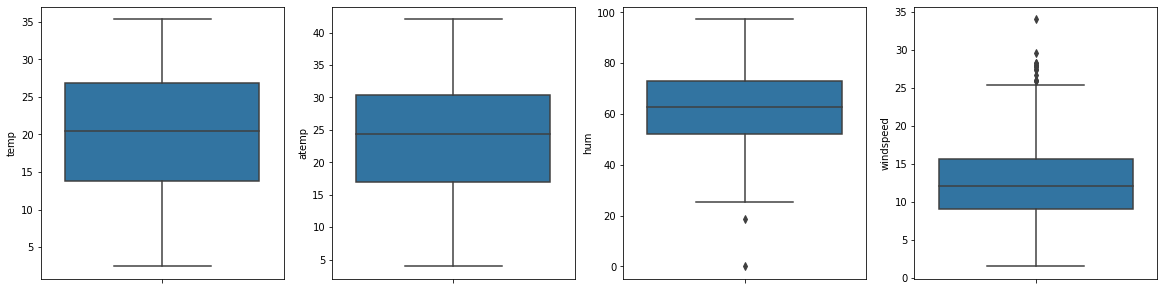

In [21]:
### we need to check the outliers for continous variablecolumns
num_cols = ["temp","atemp","hum", "windspeed"]
plt.figure(figsize=(20,5))

##  we will use boxplots to know outliers and we will loop through all numerical columns 
i = 1
for col in num_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=b2_df)
    i+=1

##### Though we dont see much outliers, In the humidity column it appears to have a value <= 0 as one outlier similarly windspeed > 30 as another outlier, lets check the numbers in the dataset

In [22]:
b2_df[b2_df.hum < 5]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,1,0,3,0,6,0,3,15.952731,19.2834,0.0,17.545759,623


In [23]:
b2_df[b2_df["windspeed"] >30]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,1,0,2,0,1,1,1,16.365847,19.5702,18.7917,34.000021,1635


##### As we can there are only two row values showing quite away from median value as outliers, we can remove them 

In [24]:
b2_df = b2_df.drop(b2_df.index[[49,68]])

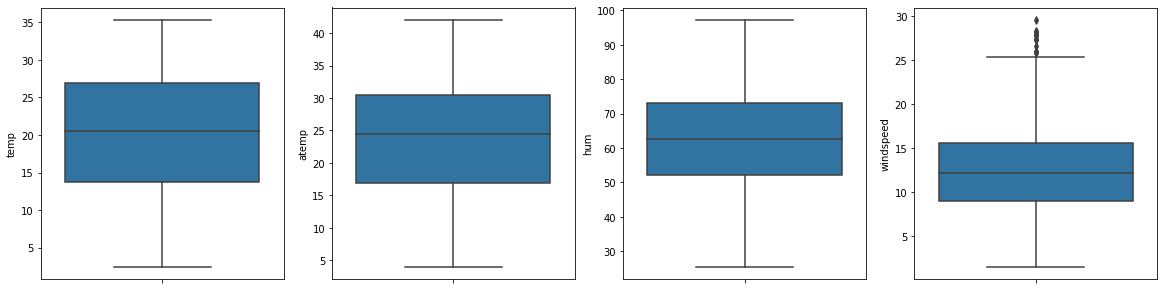

In [25]:
### rechecking outliers for continous variablecolumns
num_cols = ["temp","atemp","hum", "windspeed"]
plt.figure(figsize=(20,5))

##  we will use boxplots to know outliers and we will loop through all numerical columns 
i = 1
for col in num_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=b2_df)
    i+=1

##### we have removed the outliers, lets check the shape of the data now


In [26]:
b2_df.shape
### Looks good as we removed just 2 rows

(728, 12)

In [27]:
b2_df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

###### To understand the relationship of target variable with our independent variables, we have already separated the numerical columns; before we proceed with categorical columns the datatypes are in integer format, this can be conflicting while drawing plots ex: different seasons have numbers everytime, we have to check which number represents which season or weekend/ holiday/weekday....lets redefine the categorical variables
Note: We have to change the datatype later for ML model processing

###### Exploratory data analysis (EDA)

In [28]:
### Starting with season category replacements
b2_df["season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
b2_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [29]:
### Performing on other categories as well

b2_df.weathersit.replace({1:'Good',2:'Mediocre',3:'Bad',4:'Worse'},inplace = True)

b2_df.mnth = b2_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

b2_df.weekday = b2_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

b2_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mediocre,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mediocre,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
b2_df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### Drawing plots to understand the relationship of variables

Text(0, 0.5, 'Humidity')

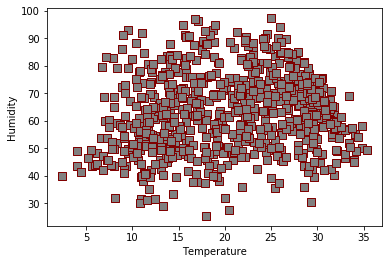

In [31]:
####  scatter plots for continous variables
plt.scatter(b2_df.temp, b2_df.hum, c ="gray",
            linewidths = 1,
            marker ="s",
            edgecolor ="maroon",
            s = 50)
plt.xlabel("Temperature")
plt.ylabel("Humidity")

Text(0, 0.5, 'windspeed')

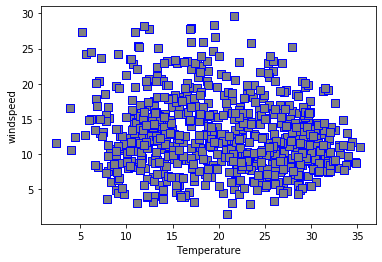

In [32]:
plt.scatter(b2_df.temp, b2_df.windspeed, c ="gray",
            linewidths = 1,
            marker ="s",
            edgecolor ="blue",
            s = 50)
plt.xlabel("Temperature")
plt.ylabel("windspeed")

In [33]:
num_cols

['temp', 'atemp', 'hum', 'windspeed']

<Figure size 1008x2016 with 0 Axes>

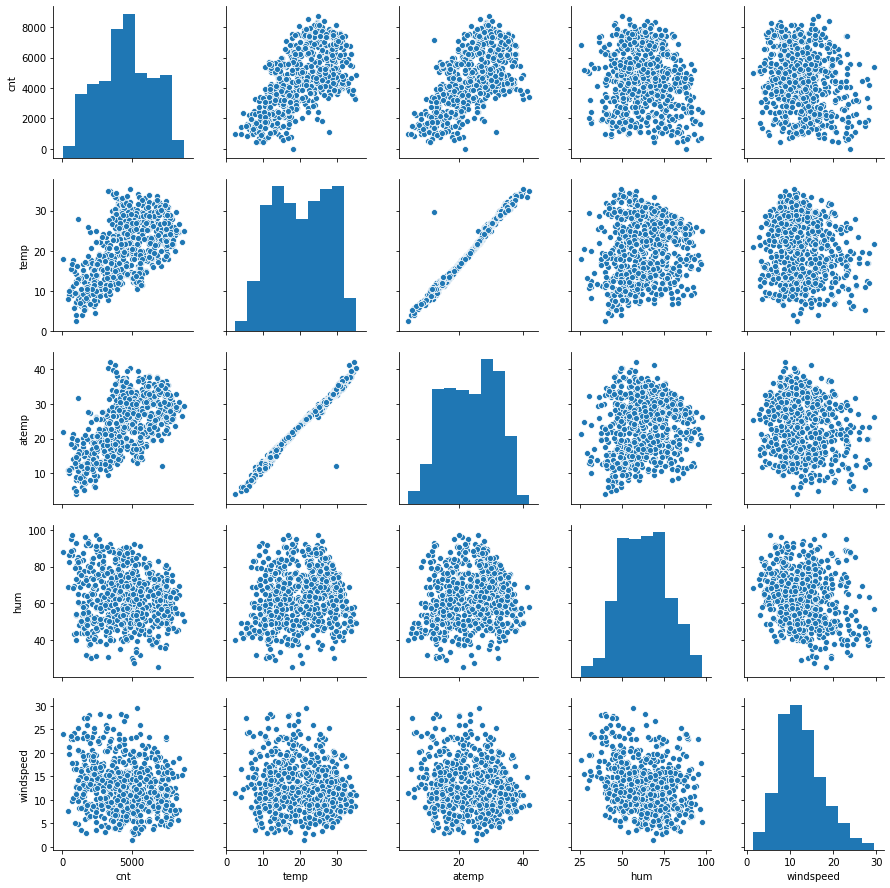

In [34]:
#### Lets draw pairplots to get overall relationship
plt.figure(figsize = (14,28))
sns.pairplot(data = b2_df, vars = ['cnt','temp', 'atemp', 'hum', 'windspeed'])
plt.show();

##### If we observe 'temp' and 'atemp' column , they have very clear linear relationship, what is difference of two terms
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius

Based on the terms defined , we observe that as temperature and feeling temperature (perhaps each person feels based on environment temperature this can be different feeling for many people).
Lets keep only temperature of place and remove atemp column as they anyways have positive linear relationship

In [35]:
b2_df[["temp", "atemp"]].head(10)

,temp,atemp
0,14.110847,18.18125
1,14.902598,17.68695
2,8.050924,9.47025
3,8.200000,10.60610
4,9.305237,11.46350
5,8.378268,11.66045
6,8.057402,10.44195
7,6.765000,8.11270
8,5.671653,5.80875
9,6.184153,7.54440


In [36]:
b2_df.drop(["atemp"], axis =1, inplace = True)

In [37]:
b2_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mediocre,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mediocre,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Good,9.305237,43.6957,12.522300,1600


In [38]:
### Saving the required dataset as separate file
b2_df.to_csv("bs3.csv", index = False)

In [39]:
ls

 Volume in drive C is SYSTEM
 Volume Serial Number is F8F6-21B1

 Directory of C:\Users\ulogana\UntG_Folder\ML\lin_regression_assignment

06/06/2022  09:21 AM    <DIR>          .
06/06/2022  09:21 AM    <DIR>          ..
06/02/2022  04:05 PM    <DIR>          .ipynb_checkpoints
06/02/2022  12:09 PM            57,542 Bike_dataset.csv
06/02/2022  12:10 PM             2,154 Bike_dictionary.txt
06/06/2022  09:21 AM           932,423 Bikesharing_regression_assignment.ipynb
06/06/2022  09:21 AM            45,997 bs3.csv
06/02/2022  12:11 PM           100,367 Linear+Regression+Subjective+Questions.pdf
               5 File(s)      1,138,483 bytes
               3 Dir(s)  248,627,761,152 bytes free


#### Re-reading the saved file

In [182]:
### Now , we have file saved, lets read our new file for further EDA
b3_df = pd.read_csv("bs3.csv")
b3_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mediocre,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mediocre,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Good,9.305237,43.6957,12.522300,1600


In [183]:
#### Lets check correlation of variables
num_cols = b3_df.select_dtypes(include = "number")
num_cols.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [184]:
cat_cols = b3_df.select_dtypes(include = "object")
cat_cols.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

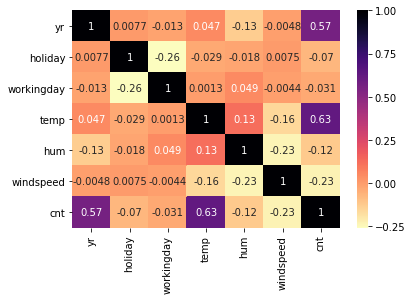

In [185]:
### Correlation of variables ###
sns.heatmap(b3_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']].corr(), cmap ='magma_r', annot = True)
plt.show();

##### Heatmap of correlation of variables


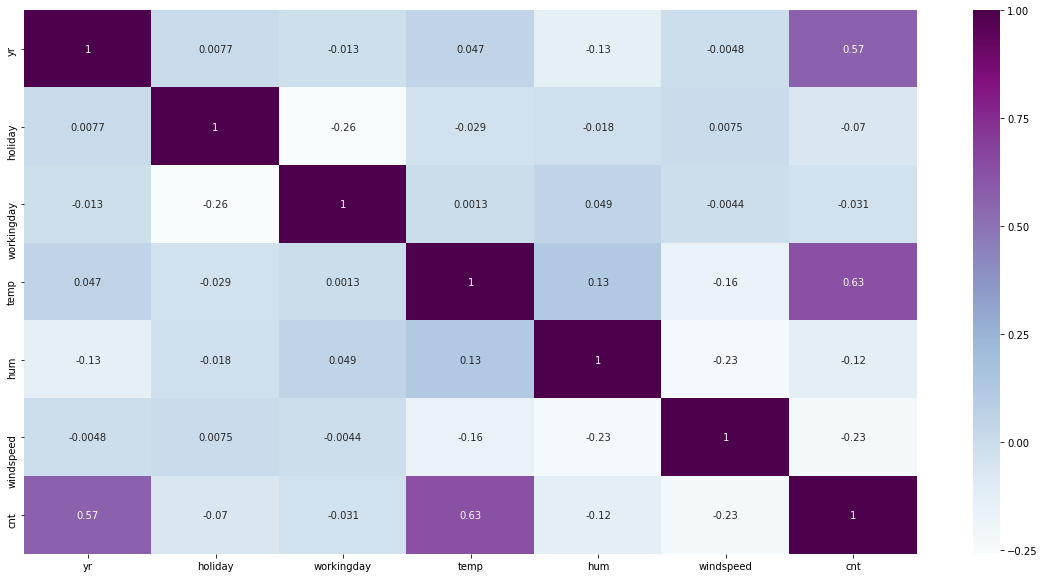

In [186]:
corr = b3_df.corr()
plt.figure(figsize = (20,10))

sns.heatmap(corr, annot= True, cmap = "BuPu")
plt.show();

From the correlation map, yr and temp seems to be highly correlated with target variable.  we will decide based on VIF (Variance inflation factor) for regression model.

##### Checking relationship of categorical variables with target variable


In [187]:
cat_cols = b3_df.select_dtypes(include = "object")
cat_cols.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

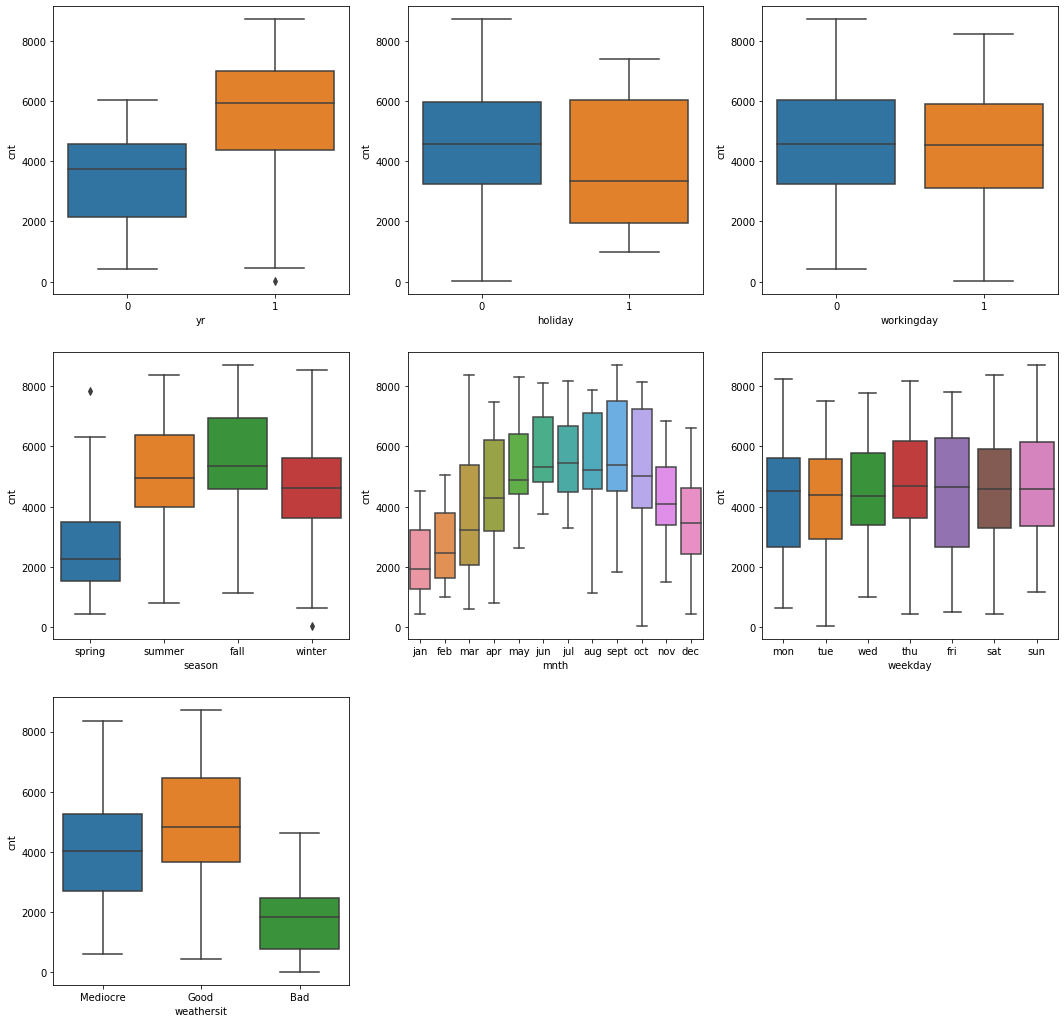

In [188]:
# Using Boxplot for categorical variables 
cat_cols = ['yr','holiday','workingday','season', 'mnth', 'weekday', 'weathersit']
plt.figure(figsize=(18, 18))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=b3_df, x=i[1], y='cnt')
plt.show();

#### Insights/observations based on categorical variables

- The second year 2019 has better rentals compared to first year 2018 probably because of good feedback from customers and branding/establishment.
- Rentals are less on holidays.
- Working day doesn't share clarity on bike rentals.
- Bike rentals are high in 3rd season (fall) relative to other seasons
- Bike rentals go higher from June to September at its peak after that it depreciates
- The Bike rentals are mostly with high IQR on every friday of the week.
- Bike rentals are high for clear(good) weather.
- Bike sharing/rentals are less at the end of the year after september due to ice pallets/snow/fog winter conditions.

#### Checking relationship of numerical variables with target variable

In [189]:
b3_df.select_dtypes(include = "number").columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'], dtype='object')

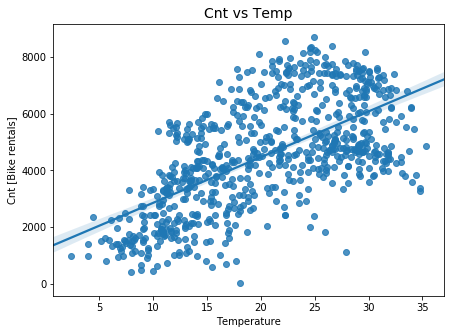

In [190]:
plt.figure(figsize=(7,5))
plt.title("Cnt vs Temp", fontsize = 14)
sns.regplot(data = b3_df, y = "cnt", x="temp")
plt.xlabel("Temperature")
plt.ylabel("Cnt [Bike rentals]")
plt.show();

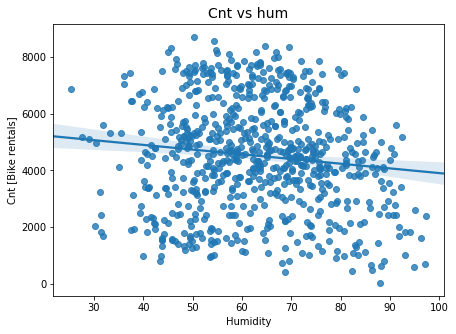

In [191]:
plt.figure(figsize=(7,5))
plt.title("Cnt vs hum", fontsize = 14)
sns.regplot(data = b3_df, y = "cnt", x="hum")
plt.xlabel("Humidity")
plt.ylabel("Cnt [Bike rentals]")
plt.show();

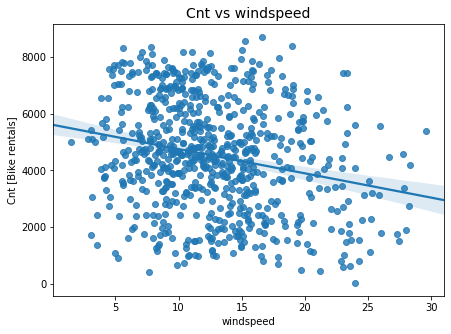

In [192]:
plt.figure(figsize=(7,5))
plt.title("Cnt vs windspeed", fontsize = 14)
sns.regplot(data = b3_df, y = "cnt", x="windspeed")
plt.xlabel("windspeed")
plt.ylabel("Cnt [Bike rentals]")
plt.show();

In [193]:
b3_df.hum.mean(),b3_df.windspeed.mean() 

(62.911793956043944, 12.727879900961534)

#### Insights/observations from continous variables

- With increase in temperature, Bike rentals are more showing linear relationship in graph with slope increasing.
- With increase in humidity and windspeed, the chances for bike rentals decreases as slope of line are in decreasing direction;
  however from low to average values of humidity and windspeed, Bike rentals are quite higher.

#### ML-model building

In [194]:
### Before we work on the data, we have to convert categorical variables to numbers
b3_df.shape

(728, 11)

In [195]:
b3_df.select_dtypes(include = "object").columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [196]:
## We have create dummy variables for category variables for ML modeling
## While creating dummy variables we know for n variables we can create (n-1) categories 
b3_df = pd.get_dummies(data = b3_df, columns = ['season', 'mnth', 'weekday'], drop_first=True)
b3_df.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,1,Mediocre,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Mediocre,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Good,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Good,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Good,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


##### In the above cell, we have taken only 'season', 'mnth', 'weekday' columns and we have used drop_first = True to have (n-1) categories from n variables however for 'weathersit' we will not do that to not have (n-1) categories

### Assignment-based Subjective Questions

2. Why is it important to use drop_first=True during dummy variable creation?

The drop_first is true it removes the first column which is created for the first unique value of a column.
example: If there are 8 columns using drop first = True will reduce the columns to 7

- when all the other columns are zero that means the first column is 1.


In [197]:
b3_df = pd.get_dummies(data = b3_df, columns = ["weathersit"])
b3_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [198]:
b3_df.shape

(728, 30)

In [199]:
b3_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Mediocre'],
      dtype='object')

In [200]:
b3_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Separating target and independent variables, splitting dataset into train and test datasets

In [201]:
## removing and retaining target variable from dataframe using .pop method
y = b3_df.pop("cnt")
X = b3_df

In [202]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [203]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [204]:
X.shape, y.shape

((728, 29), (728,))

In [205]:
### Before splitting dataset lets import necessary libraries for ML model calculations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Separating train and test dataset with 70:30 ratio
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size= 0.30, random_state = 1)

In [206]:
## Checking shape of datasets
X_train.shape, X_test.shape

((509, 29), (219, 29))

In [207]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
404,1,0,1,9.190847,73.1250,19.416332,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
135,0,0,1,22.550000,87.0000,13.499964,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
441,1,0,1,22.994153,80.7917,8.125157,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
467,1,0,1,24.873347,50.7917,15.083643,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
310,0,0,1,16.400000,75.8333,4.167119,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### General subjective questions

4. What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized scaling?


- Scaling is a technique to standardize the independent features/variables present in the data in a fixed range.
- Scaling is performed to make sure all the variables value fall within certain boundary range for example: all values within 0 and 1
- Having features on a same scale can help the gradient descent converge more quickly towards the minima.
- Standardization (or Z-score normalization) scaling is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1
- Normalization (Min-Max scaling), This technique is to re-scales features with a distribution value between 0 and 1. For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1

In [208]:
### Lets perform scaling of variables for ML building/modeling
## Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [209]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
404,1,0,1,9.190847,73.1250,19.416332,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
135,0,0,1,22.550000,87.0000,13.499964,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
441,1,0,1,22.994153,80.7917,8.125157,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
467,1,0,1,24.873347,50.7917,15.083643,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
310,0,0,1,16.400000,75.8333,4.167119,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
### Scaling the continous variables
num_cols = ["temp", "hum", "windspeed"]

### Using Normalized Min-Max scaler
scaler = MinMaxScaler()

#### Using fit_transform method on training dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [211]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
404,1,0,1,0.205644,0.646520,0.637936,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
135,0,0,1,0.611648,0.849817,0.427272,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
441,1,0,1,0.625146,0.758853,0.235892,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
467,1,0,1,0.682257,0.319292,0.483662,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
310,0,0,1,0.424740,0.686202,0.094959,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [212]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.500982,0.021611,0.703340,0.555153,0.505785,0.392436,0.218075,0.259332,0.257367,0.088409,...,0.084479,0.135560,0.145383,0.133595,0.137525,0.141454,0.135560,0.033399,0.642436,0.324165
std,0.500491,0.145553,0.457235,0.223921,0.203362,0.180898,0.413345,0.438699,0.437614,0.284168,...,0.278379,0.342657,0.352833,0.340552,0.344739,0.348832,0.342657,0.179852,0.479754,0.468522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.366591,0.354091,0.265594,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.566998,0.504274,0.363494,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745598,0.648963,0.494030,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Building regression model after scaling the training dataset

In [213]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
y_pred = Lr.predict(X_train)
y_pred

array([ 1001.42733131,  3606.45984828,  5505.46142034,  6465.74708171,
        3968.62972161,  2840.87621081,  2068.7414965 ,  5340.29761468,
        6316.27516387,  3462.49579686,  2944.68264404,  6850.85783117,
        1410.99521275,  7168.42282351,  5414.22738997,  2016.4639625 ,
        3186.50982651,  3089.53215377,  3905.57257445,  5288.93374781,
        5343.18534085,  5312.49905319,  2293.37956979,  4508.05198811,
        6278.88715595,  3041.33831856,  3590.48264185,  7122.68856858,
         697.39836913,  6960.92768194,  4430.06992076,  5014.63124546,
        4487.72177879,  6835.84480498,  4790.95132247,  3356.71395403,
        2295.83335535,  4415.44208013,  1027.51507287,  7252.20720914,
        2626.48041986,  7357.0994998 ,  5251.01939439,  4799.06264888,
        2913.19259437,  1724.38325749,  1926.52735413,  4898.36949348,
        6921.47409523,  4085.12097578,  4263.70013733,  5989.1506087 ,
        3911.8474735 ,  4405.66817878,  1074.00962345,  5366.21713511,
      

In [215]:
#### We already know that we can also use statsmodel however RFE(Recursive feature elimination) can be used as it is automated approach to eliminate certain features
rfe = RFE(Lr,15)
rfe = rfe.fit(X_train, y_train)

In [216]:
rfe_df  = pd.DataFrame({'Pre_var': X_train.columns, 'Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by = "Ranking")

,Pre_var,Status,Ranking
0,yr,True,1
15,mnth_mar,True,1
27,weathersit_Good,True,1
13,mnth_jul,True,1
19,mnth_sept,True,1
21,weekday_sat,True,1
22,weekday_sun,True,1
26,weathersit_Bad,True,1
18,mnth_oct,True,1
6,season_spring,True,1


In [227]:
cols = X_train.columns[rfe.support_]
Lr = LinearRegression()
Lr.fit(X_train[cols], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [228]:
X_train.shape

(509, 29)

In [230]:
### Lets predict the model using columns with rfe.support
y_pred = Lr.predict(X_train[cols])
y_pred

array([ 1158.9660531 ,  3240.17990277,  5388.7271948 ,  6509.84645142,
        3740.20487617,  2772.90372685,  2345.53915855,  5130.58026492,
        6495.10899979,  3628.94727558,  2974.18691547,  7068.76607746,
        1665.74753064,  6925.29076455,  5423.72643784,  1981.68382625,
        3229.24497974,  2881.91302337,  3911.91106928,  5699.77939201,
        5471.36970453,  5404.78426035,  2277.19298337,  4690.60264598,
        6054.48192472,  3199.20196309,  3585.00386732,  7189.95049688,
         871.93913452,  6997.3734474 ,  4297.44346661,  4755.0000123 ,
        4468.90092403,  6958.12795941,  4867.81309123,  3440.86493279,
        2599.50533744,  4460.83566423,  1198.62487768,  7241.88862423,
        2541.01697689,  7485.01634762,  5254.4022093 ,  4460.98514766,
        2980.43959762,  1486.20929742,  2014.16140338,  4742.54051569,
        6952.44094246,  4167.24738047,  4303.89826182,  6120.31869814,
        3902.33501698,  4212.55158315,   936.35478329,  5608.76500936,
      

####  Though we cannot rely completely on automated elimination approach, lets try manual approach

### Model-1

In [232]:
X_train_rfe = X_train[cols]
X_train_sm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_sm)
lr1_model= lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.67e-185
Time:                        18:23:59   Log-Likelihood:                -4100.4
No. Observations:                 509   AIC:                             8233.
Df Residuals:                     493   BIC:                             8300.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4002.7917    667.804      5.994      0.000    2690.699    5314.885
yr               2063.8002     69.896     29.527      0.000    1926.470    2201.131
holiday         -1433.0847    556.298     -2.576      0.010   -2526.091    -340.078
workingday      -1446.6601    617.216     -2.344      0.019   -2659.357    -233.963
temp             3550.3246    223.867     15.859      0.000    3110.474    3990.175
hum             -1004.1944    241.063     -4.166      0.000   -1477.833    -530.556
windspeed       -1484.1073    206.226     -7.196      0.000   -1889.298   -1078.916
season_spring   -1274.2433    112.129    -11.364      0.000   -1494.554   -1053.933
mnth_jul         -580.5852    139.455     -4.163      0.000    -854.585    -306.586
mnth_mar          429.5752    140.214      3.064      0.002     154.085     705.065
mnth_oct          555.7664    129.925      4.278      0.000     300.491     811.042
mnth_sept         536.7130    132.059      4.064      0.000     277.244     796.182
weekday_sat     -1289.2453    615.675     -2.094      0.037   -2498.916     -79.575
weekday_sun     -1168.2458    614.847     -1.900      0.058   -2376.290      39.799
weathersit_Bad  -1320.8275    210.458     -6.276      0.000   -1734.332    -907.323
weathersit_Good   506.1173     93.211      5.430      0.000     322.977     689.257
==============================================================================
Omnibus:                       93.734   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.124
Skew:                          -0.928   Prob(JB):                     8.78e-52
Kurtosis:                       5.764   Cond. No.                         68.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Since we have rerun the model several times and alos find VIF for the variables, lets write user defined function to quicky run the model and check VIF values recurrently.

In [233]:
##### user defined function for model building using stats models
def model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [234]:
X_train.values

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [235]:
##### user defined function for calculating VIF(variance inflation factor)
def VIF(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    print(vif.sort_values(by="VIF", ascending = False))

##### Checking VIF values for Model-1

In [236]:
cols  = X_train.columns[rfe.support_]
VIF(cols)

           Features    VIF
2        workingday  28.81
3              temp  14.44
4               hum  13.80
5         windspeed   6.54
11      weekday_sat   6.54
12      weekday_sun   6.18
14  weathersit_Good   4.62
6     season_spring   2.21
0                yr   2.03
1           holiday   1.63
7          mnth_jul   1.49
10        mnth_sept   1.25
13   weathersit_Bad   1.25
9          mnth_oct   1.20
8          mnth_mar   1.18


####  We can see that Rsquared value is good 84% and we observe keenly on certain variables

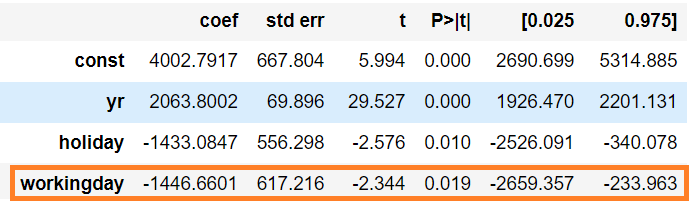

- The `working day` variable shows high negative coefficients , p values and high VIF > 5, so we can eliminate this first variable for regression model building

### Model-2

In [237]:
cols  = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.84e-185
Time:                        18:25:04   Log-Likelihood:                -4103.2
No. Observations:                 509   AIC:                             8236.
Df Residuals:                     494   BIC:                             8300.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2540.1846    238.907     

In [238]:
VIF(cols)

           Features    VIF
2              temp  12.07
3               hum   7.35
4         windspeed   4.97
13  weathersit_Good   3.37
5     season_spring   1.96
0                yr   1.95
6          mnth_jul   1.48
9         mnth_sept   1.24
12   weathersit_Bad   1.23
8          mnth_oct   1.20
10      weekday_sat   1.20
11      weekday_sun   1.19
7          mnth_mar   1.18
1           holiday   1.04


### Model-3

-  As we observe high VIF and negative coefficients but zero pvalue for temperature and humidity, probably the variables are highly correlated we have to decide dropping the variables one or other based iterative process

In [239]:
cols  = ['yr', 'holiday', 'hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          5.12e-142
Time:                        18:25:06   Log-Likelihood:                -4209.4
No. Observations:                 509   AIC:                             8447.
Df Residuals:                     495   BIC:                             8506.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4261.1727    262.522     

In [240]:
VIF(cols)

           Features   VIF
3         windspeed  4.51
2               hum  3.85
12  weathersit_Good  2.50
0                yr  1.91
4     season_spring  1.49
8         mnth_sept  1.22
9       weekday_sat  1.20
5          mnth_jul  1.19
7          mnth_oct  1.19
11   weathersit_Bad  1.19
6          mnth_mar  1.18
10      weekday_sun  1.18
1           holiday  1.03


##### Based on model-3 it appears that losing temperature is reflecting high P values for holiday and weekday saturday, however VIF values are low

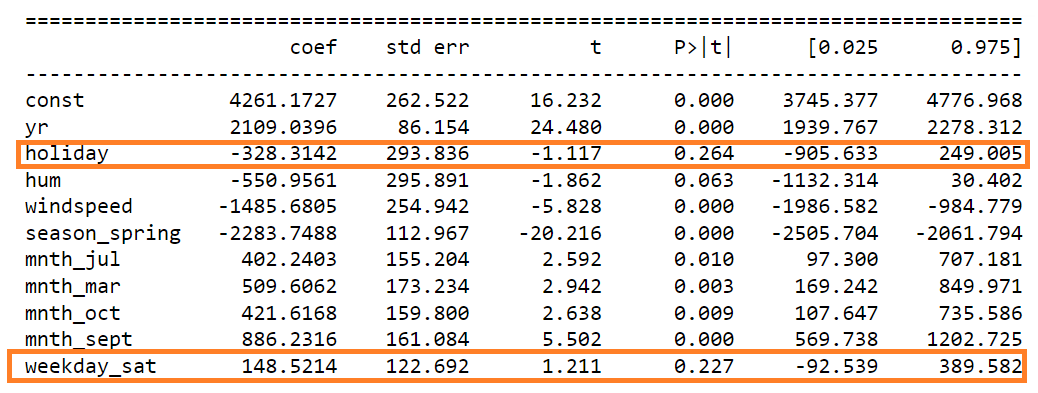

### Model-4

- Eliminating humidity instead of temperature and let's see how model responds


In [241]:
cols  = ['yr', 'holiday', 'temp', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          6.67e-183
Time:                        18:25:13   Log-Likelihood:                -4112.0
No. Observations:                 509   AIC:                             8252.
Df Residuals:                     495   BIC:                             8311.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1836.0387    172.142     

In [242]:
VIF(cols)

           Features   VIF
2              temp  6.32
3         windspeed  4.86
12  weathersit_Good  2.95
0                yr  1.95
4     season_spring  1.72
5          mnth_jul  1.40
8         mnth_sept  1.22
9       weekday_sat  1.20
10      weekday_sun  1.19
6          mnth_mar  1.18
7          mnth_oct  1.14
11   weathersit_Bad  1.13
1           holiday  1.03


### Model-5

- By eliminating humidity and temperature, we observed that high P values and negative coefficients for Holiday lets remove that keeping temperature and humidity back to model

In [243]:
cols  = ['yr', 'temp','hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.25e-186
Time:                        18:25:16   Log-Likelihood:                -4103.8
No. Observations:                 509   AIC:                             8236.
Df Residuals:                     495   BIC:                             8295.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2541.6102    238.936     

In [244]:
VIF(cols)

           Features    VIF
1              temp  12.06
2               hum   7.34
3         windspeed   4.97
12  weathersit_Good   3.36
4     season_spring   1.96
0                yr   1.95
5          mnth_jul   1.47
8         mnth_sept   1.24
11   weathersit_Bad   1.23
9       weekday_sat   1.20
7          mnth_oct   1.19
10      weekday_sun   1.19
6          mnth_mar   1.18


### Model-6

-  lets remove wekday_sat and check the model again with temperature and humidity back to model

In [245]:
cols  = ['yr', 'temp','hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          3.88e-187
Time:                        18:25:17   Log-Likelihood:                -4104.7
No. Observations:                 509   AIC:                             8235.
Df Residuals:                     496   BIC:                             8290.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2571.4512    238.171     

In [246]:
VIF(cols)

           Features    VIF
1              temp  12.03
2               hum   7.33
3         windspeed   4.94
11  weathersit_Good   3.35
4     season_spring   1.96
0                yr   1.95
5          mnth_jul   1.47
8         mnth_sept   1.24
10   weathersit_Bad   1.23
7          mnth_oct   1.19
6          mnth_mar   1.18
9       weekday_sun   1.16


### Model-7

-  lets remove hum as it has negative coeffcient and high VIF value.

In [247]:
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.91e-184
Time:                        18:25:19   Log-Likelihood:                -4113.9
No. Observations:                 509   AIC:                             8252.
Df Residuals:                     497   BIC:                             8303.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1853.5172    171.689     

In [248]:
VIF(cols)

           Features   VIF
1              temp  6.24
2         windspeed  4.82
10  weathersit_Good  2.95
0                yr  1.95
3     season_spring  1.72
4          mnth_jul  1.40
7         mnth_sept  1.22
5          mnth_mar  1.17
8       weekday_sun  1.16
6          mnth_oct  1.14
9    weathersit_Bad  1.13


### Model-8

-  lets remove temp as it has high VIF value.

In [249]:
cols  = ['yr', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          7.60e-144
Time:                        18:25:21   Log-Likelihood:                -4212.7
No. Observations:                 509   AIC:                             8447.
Df Residuals:                     498   BIC:                             8494.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3863.8223    134.719     

In [250]:
VIF(cols)

          Features   VIF
1        windspeed  3.20
9  weathersit_Good  2.49
0               yr  1.84
2    season_spring  1.49
4         mnth_mar  1.17
3         mnth_jul  1.16
7      weekday_sun  1.14
8   weathersit_Bad  1.13
5         mnth_oct  1.11
6        mnth_sept  1.11


### Model-9

-  lets remove season_spring as it has high -ve co-effcient

In [251]:
cols  = ['yr', 'windspeed', 'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept', 'weekday_sun', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     67.75
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           8.39e-81
Time:                        18:25:23   Log-Likelihood:                -4364.6
No. Observations:                 509   AIC:                             8749.
Df Residuals:                     499   BIC:                             8791.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3576.7762    180.341     

In [252]:
VIF(cols)

          Features   VIF
1        windspeed  2.93
8  weathersit_Good  2.47
0               yr  1.84
6      weekday_sun  1.14
2         mnth_jul  1.13
7   weathersit_Bad  1.13
3         mnth_mar  1.12
4         mnth_oct  1.09
5        mnth_sept  1.09


#### Model -10

-  From model -9, we have high P values for mnth_march, weekday_sunday, lets check it removing weekday_sunday and rebring temp and humidity.

In [253]:
cols  = ['yr', 'temp','hum', 'windspeed',
       'season_spring', 'mnth_jul', 'mnth_oct', 'mnth_sept', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.07e-186
Time:                        18:25:27   Log-Likelihood:                -4112.1
No. Observations:                 509   AIC:                             8246.
Df Residuals:                     498   BIC:                             8293.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2589.2238    240.860     

In [254]:
VIF(cols)

          Features    VIF
1             temp  11.93
2              hum   7.32
3        windspeed   4.92
9  weathersit_Good   3.33
0               yr   1.95
4    season_spring   1.87
5         mnth_jul   1.47
7        mnth_sept   1.23
8   weathersit_Bad   1.23
6         mnth_oct   1.19


#### Model -11

-   In this model , we will remove humidity again and mnth_july as it is with negative coeffcient, lets check

In [352]:
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     289.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          4.55e-182
Time:                        22:11:24   Log-Likelihood:                -4128.2
No. Observations:                 509   AIC:                             8274.
Df Residuals:                     500   BIC:                             8313.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2024.9031    171.494     

In [353]:
VIF(cols)

          Features   VIF
1             temp  5.06
2        windspeed  4.59
7  weathersit_Good  2.91
0               yr  1.95
3    season_spring  1.62
5        mnth_sept  1.16
6   weathersit_Bad  1.12
4         mnth_oct  1.10


#### Model -12

-   In this model-11 , results look reasonable , lets re-bring weekday_sunday, weekday_satday

In [257]:
cols  = ['yr', 'temp', 'windspeed','weekday_sun','weekday_sat',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          3.41e-181
Time:                        18:25:39   Log-Likelihood:                -4124.5
No. Observations:                 509   AIC:                             8271.
Df Residuals:                     498   BIC:                             8317.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1983.7114    171.481     

In [258]:
VIF(cols)

          Features   VIF
1             temp  5.23
2        windspeed  4.63
9  weathersit_Good  2.91
0               yr  1.95
5    season_spring  1.63
4      weekday_sat  1.20
3      weekday_sun  1.19
7        mnth_sept  1.16
8   weathersit_Bad  1.13
6         mnth_oct  1.11


- The model-12 appears to have high p value for weekday_sat and check it again

### Model-13

In [259]:
cols  = ['yr', 'temp', 'windspeed','weekday_sun',
       'season_spring', 'mnth_oct', 'mnth_sept', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.3
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          7.70e-182
Time:                        18:25:41   Log-Likelihood:                -4125.8
No. Observations:                 509   AIC:                             8272.
Df Residuals:                     499   BIC:                             8314.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2010.1229    170.997     

In [260]:
VIF(cols)

          Features   VIF
1             temp  5.16
2        windspeed  4.59
8  weathersit_Good  2.91
0               yr  1.95
4    season_spring  1.63
3      weekday_sun  1.16
6        mnth_sept  1.16
7   weathersit_Bad  1.12
5         mnth_oct  1.11


In [261]:
b3_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Mediocre'],
      dtype='object')

#### Overall Model-11 appears to be good with Rsquare = 82% and we can do final check if mnth_sept and mnth_oct affect or not

#### Model-11.1

In [262]:
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_sept','weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     317.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.16e-179
Time:                        18:25:43   Log-Likelihood:                -4136.8
No. Observations:                 509   AIC:                             8290.
Df Residuals:                     501   BIC:                             8324.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2195.3228    169.195     

In [263]:
VIF(cols)

          Features   VIF
1             temp  5.02
2        windspeed  4.58
6  weathersit_Good  2.91
0               yr  1.94
3    season_spring  1.60
4        mnth_sept  1.15
5   weathersit_Bad  1.12


#### Model-11.2

In [264]:
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_oct', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     317.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.07e-179
Time:                        18:25:45   Log-Likelihood:                -4136.8
No. Observations:                 509   AIC:                             8290.
Df Residuals:                     501   BIC:                             8323.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2072.6899    173.829     

In [265]:
VIF(cols)

          Features   VIF
1             temp  4.78
2        windspeed  4.56
6  weathersit_Good  2.91
0               yr  1.95
3    season_spring  1.62
5   weathersit_Bad  1.12
4         mnth_oct  1.09


#### From derivative of model-11, both 11.1 and 11.2 doesn't affect much . 
## Inference

#### Model-11 is better though there is not much change R-square and adjusted R-square values, VIF values are less than 5, All the p values is 0.0 an, Difference between R-squared and Adjusted R-squared values are in close range, so there are no additional parameters that can be removed from this model

In [266]:
### Model-11
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_oct','mnth_sept', 'weathersit_Bad', 'weathersit_Good']
model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     289.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          4.55e-182
Time:                        18:25:47   Log-Likelihood:                -4128.2
No. Observations:                 509   AIC:                             8274.
Df Residuals:                     500   BIC:                             8313.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2024.9031    171.494     

In [267]:
VIF(cols)

          Features   VIF
1             temp  5.06
2        windspeed  4.59
7  weathersit_Good  2.91
0               yr  1.95
3    season_spring  1.62
5        mnth_sept  1.16
6   weathersit_Bad  1.12
4         mnth_oct  1.10


### Model prediction and evaluation
##### Residual analysis

In [268]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
404,1,0,1,0.205644,0.646520,0.637936,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
135,0,0,1,0.611648,0.849817,0.427272,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
441,1,0,1,0.625146,0.758853,0.235892,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
467,1,0,1,0.682257,0.319292,0.483662,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
310,0,0,1,0.424740,0.686202,0.094959,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [269]:
y_train.head()

404    2169
135    3855
441    6093
467    7132
310    4109
Name: cnt, dtype: int64

In [271]:
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_oct','mnth_sept', 'weathersit_Bad', 'weathersit_Good']

X_train =  X_train[cols]
X_train.head()

,yr,temp,windspeed,season_spring,mnth_oct,mnth_sept,weathersit_Bad,weathersit_Good
404,1,0.205644,0.637936,1,0,0,1,0
135,0,0.611648,0.427272,0,0,0,0,0
441,1,0.625146,0.235892,1,0,0,0,1
467,1,0.682257,0.483662,0,0,0,0,1
310,0,0.424740,0.094959,0,0,0,0,1


In [275]:
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_oct','mnth_sept', 'weathersit_Bad', 'weathersit_Good']



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [276]:
y_train_pred = Lr.predict(X_train[cols])

In [282]:
###  We have predicted the values for train set, lets find the error terms and plot histogram
def err_hist(act, pred):
    sns.distplot(act-pred)
    plt.title("Error terms")
    plt.xlabel("Errors")

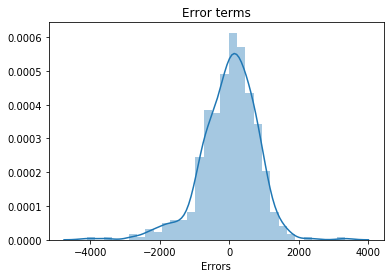

In [283]:
err_hist(y_train, y_train_pred)

#### Errors are normally distributed here with mean 0,so everything looks good

In [299]:
X_train[cols].shape, res.shape

((509, 8), (509,))

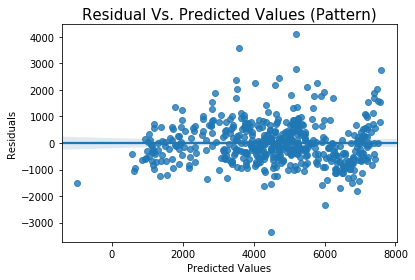

In [302]:
res = (y_train_pred - y_train)
sns.regplot(x=y_train_pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern)', fontdict={'fontsize': 15})
plt.xlabel('Predicted Values', fontdict={'fontsize': 10})
plt.ylabel('Residuals', fontdict={'fontsize': 10})
plt.show();

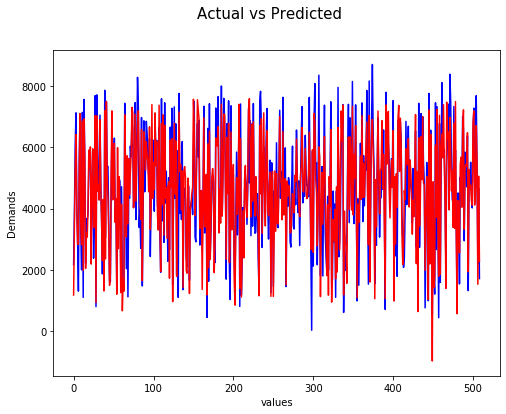

In [307]:
### Lets compare the values in graph of actual versus predicted
x = [i for i in range(0,len(X_train),1)]
plt.figure(figsize = (8,6))
plt.plot(x,y_train, color="blue")
plt.plot(x,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('values')
plt.ylabel('Demands')
plt.show();

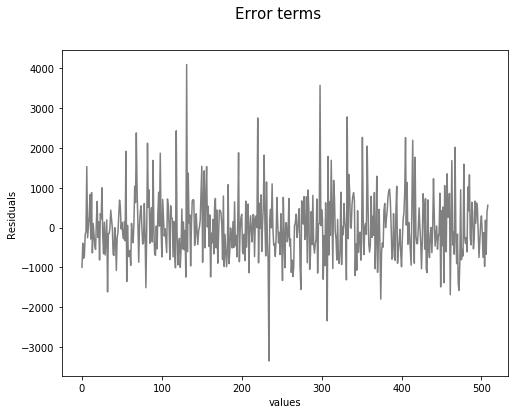

In [310]:
### Plotting error terms
x = [i for i in range(0,len(X_train),1)]
plt.figure(figsize = (8,6))
plt.plot(x,res, color="gray")
plt.suptitle('Error terms', fontsize = 15)
plt.xlabel('values')
plt.ylabel('Residuals')
plt.show();

#### Homoscedasticity of predictions

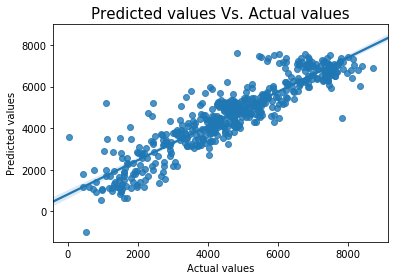

In [329]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted values Vs. Actual values', fontdict={'fontsize': 15})
plt.xlabel('Actual values', fontdict={'fontsize': 10})
plt.ylabel('Predicted values', fontdict={'fontsize': 10})
plt.show();

###### Evaluating correlation coeffcient of predictors and target variables

In [317]:
from scipy.stats import pearsonr

In [326]:
corr_dict = {index: round(pearsonr(y_train, X_train[index])[0],2) for index in X_train[cols]}
corr_dict

{'yr': 0.58,
 'temp': 0.61,
 'windspeed': -0.27,
 'season_spring': -0.53,
 'mnth_oct': 0.1,
 'mnth_sept': 0.19,
 'weathersit_Bad': -0.26,
 'weathersit_Good': 0.27}

In [327]:
#### Checking R-square value
r2_score(y_train,y_train_pred)

0.8221958436771069

###### R2 value same as the model-11, all good

### Predictors on test data set

In [330]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
248,0,0,0,25.990433,93.9565,12.914116,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
673,1,0,1,12.129153,54.7500,20.375236,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
159,0,0,1,29.725000,65.4583,10.374950,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
355,0,0,1,12.402500,54.2500,12.750368,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
510,1,1,0,29.212500,67.6250,13.166907,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [333]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Mediocre'],
      dtype='object')

##### We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data

In [339]:
num_cols= ['temp', 'hum', 'windspeed']

### Test data transformed 
X_test[num_cols] = scaler.transform(X_test[num_cols]) 
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
248,0,0,0,0.710967,1.048052,0.403456,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
673,1,0,1,0.230893,0.478446,0.762244,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
159,0,0,1,0.840310,0.634020,0.281353,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
355,0,0,1,0.240360,0.471182,0.395581,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
510,1,1,0,0.822560,0.665499,0.415612,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [340]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Bad,weathersit_Good,weathersit_Mediocre
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.502283,0.045662,0.662100,0.485934,0.576492,0.417556,0.305936,0.237443,0.214612,0.077626,...,0.077626,0.159817,0.132420,0.164384,0.155251,0.150685,0.159817,0.013699,0.616438,0.369863
std,0.501140,0.209229,0.474078,0.269994,0.204990,0.252741,0.461858,0.426491,0.411493,0.268194,...,0.268194,0.367276,0.339723,0.371472,0.362974,0.358561,0.367276,0.116503,0.487367,0.483873
min,0.000000,0.000000,0.000000,-0.050894,0.052281,-0.067254,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.240360,0.416095,0.235293,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.462827,0.574696,0.407544,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.719610,0.725007,0.558898,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.016627,1.048052,1.094864,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [341]:
### Columns from final, model-11
cols  = ['yr', 'temp', 'windspeed',
       'season_spring', 'mnth_oct','mnth_sept', 'weathersit_Bad', 'weathersit_Good']

### predicting on test data
y_test_pred = Lr.predict(X_test[cols])


In [342]:
### Rsquared value for test datset
r2_score(y_test, y_test_pred)

0.797725385881803

#### Homoscedasticity of test predictions

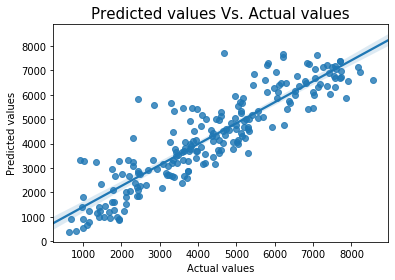

In [343]:
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted values Vs. Actual values', fontdict={'fontsize': 15})
plt.xlabel('Actual values', fontdict={'fontsize': 10})
plt.ylabel('Predicted values', fontdict={'fontsize': 10})
plt.show();

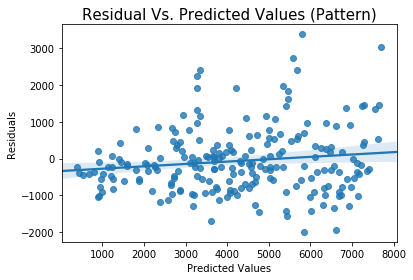

In [344]:
##### Checking on residuals on test data
res = (y_test_pred - y_test)
sns.regplot(x=y_test_pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern)', fontdict={'fontsize': 15})
plt.xlabel('Predicted Values', fontdict={'fontsize': 10})
plt.ylabel('Residuals', fontdict={'fontsize': 10})
plt.show();

#### Based on error terms (residuals) are distrbuted randomly well, which explains the model is better nad has decent predictive power

In [346]:
X_test.shape, y_test.shape

((219, 29), (219,))

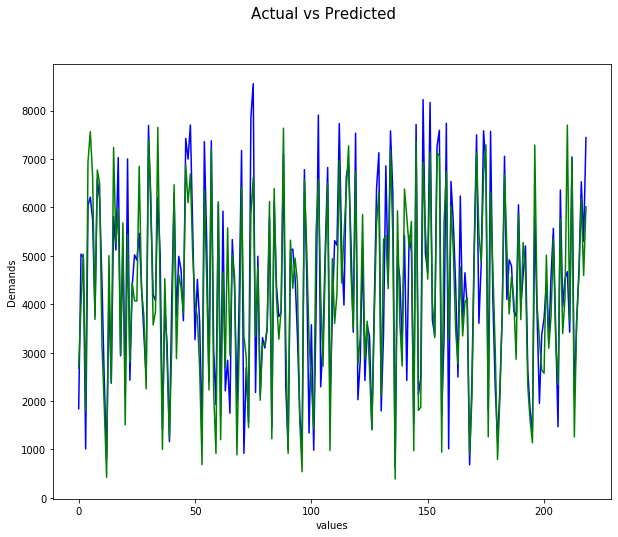

In [348]:
### Lets compare the values in graph of actual versus predicted
x = [i for i in range(0,len(X_test),1)]
plt.figure(figsize = (10,8))
plt.plot(x,y_test, color="blue")
plt.plot(x,y_test_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('values')
plt.ylabel('Demands')
plt.show();

#### As we can see predicted test values are close to the actual test values

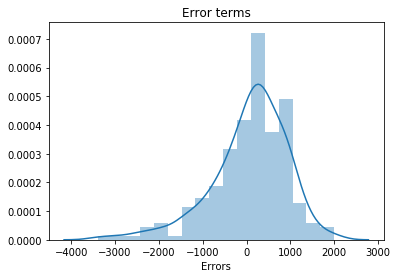

In [349]:
err_hist(y_test, y_test_pred)

## Interpretation and inference of results to the company/organisation

#### - The company should be ready cater more rentals if the temperature is moderate around 25-30 C and windspeed is low
#### - The company should focus more rentals/offers during summer and fall as this is evident for high rentals during this months
#### - The company should offer more rental bikes in the months of september to october
#### - The company should use good weather conditions for bike rentals with subsidised offers and bad weather to regear the bikes
#### - Weekends (friday/sat/sun) are observed with more rentals , some offers are recommended here to customers.
#### - During peak months (Aug - Oct), this is the season from summer to fall(autumn), Rental companies can conduct marathons to certain tourist spots.

#### List of significant variables

-  Temperature
-  Weekends
-  Holidays
-  windspeed
-  season
-  Months
-  Year 2019
-  weathersit
